# Customer Segmentation: 

Can you segment customers based on their ordering behavior, such as frequency, time of day, or days since prior order, to better understand their preferences and propose ways to optimize marketing strategies?

## Solution

**Summary:** 

To address this question, I employed an **RFM (Recency, Frequency, Monetary Value)** strategy combined with **K-means clustering** for client segmentation. Since Monetary Value data was not available, I used the mean number of products per order (*mean_products*) as a proxy for value. Additionally, I included two more features: whether the client typically orders before or after midday (*b_a_12*) and whether they usually place orders earlier or later in the week (*e_l_week*). The most intesting number of cluster was 5 and it enabled tailored marketing strategies.

**Data Processing:** 

To prepare the data for K-means clustering, I worked with the *orders* and *order_products* datasets. The orders dataset was used to derive the *Frequency*, *Recency*, *b_a_12*, and *e_l_week* features, while the *order_products* dataset was used to calculate the *mean_products* feature.

I began by checking for missing data and anomalies using distribution plots, and no issues were found. For the orders dataset, I engineered the *order_dow* and *order_hour_of_day* features into *b_a_12* (before/after midday) and *e_l_week* (early/late week). For the *order_products* dataset, I grouped the data by *order_id* and *aggregated* it to obtain the count of products per order. This information was then merged into the *orders* dataset.

Since the *orders* dataset was structured as an **Order View**, I needed to transform it into a **Client View** by grouping the data by *client_i*d and aggregating the relevant features. Specifically:

- *Frequency* was calculated as the count of *order_id*.
- *Recency* was the last value of *days_since_prior_order*.
- *mean_products*, *mean_interval*, *b_a_12*, and *e_l_week* were computed as the mean values for each client.
  
Next, I examined the distribution of the features to identify any skewness, as skewed data can negatively impact K-means clustering. I found that both *Frequency* and *mean_product*s were skewed, so I applied a log transformation to these features. I then re-plotted the distributions to confirm that the data was less skewed. Finally, I standardized all features, as K-means clustering performs best on standardized data.

**Clustering:**

For clustering, I applied the **K-means** algorithm, exploring a range of 2 to 10 clusters. To determine the optimal number of clusters, I used the **Elbow method**, which evaluates the *within-cluster sum of squares (WCSS)*. The *WCSS* plot didn’t present a clear elbow, so I analyzed both **4** and **5 clusters**, as these points showed a more subtle reduction in WCSS. I compared the results from these cluster counts.

For visualizing the clusters within the data, I employed a **3D PCA** scatterplot. The first three principal components (PCs) captured **70.3%** of the variance, offering a reliable representation of the data distribution. Additionally, I compared the clusters based on feature means and visualized these comparisons through a **Snake plot**. The segmentation with **5 clusters** provided better results compared to 4 clusters. Specifically, the 5-cluster model produced clusters with distinct variations in the *b_a_12* feature. This variation allows for **more targeted marketing strategies** based on this feature.

**Customer segments:**

Here is described the characteristics of each cluster found in the K-means clustering.
 
Cluster 0:

- *Frequency:* Very high frequency, indicating frequent ordering behavior.
- *Recency:* High, meaning these customers have ordered recently.
- *Mean Products:* High, indicating they purchase a larger number of products per order.
- *Mean Interval*: Short intervals between orders.
- *b_a_12:* Positive value suggests these customers are more likely to order after midday.
- *e_l_week:* Slightly positive, indicating a tendency to order later in the week.
- *Summary:* High-engagement customers who frequently order a large number of products, mostly after midday and towards the end of the week.

Cluster 1:

- *Frequency:* Low frequency, meaning these customers order less often.
- *Recency:* Very low, indicating they haven't ordered recently.
- *Mean Products:* Very low, meaning they purchase fewer products per order.
- *Mean Interval:* Long intervals between orders.
- *b_a_12:* Negative value suggests these customers tend to order before midday.
- *e_l_week:* Tends towards earlier in the week.
- *Summary:* Low-engagement customers who infrequently order a small number of products, primarily before midday and early in the week.
  
Cluster 2:

- *Frequency:* Moderate frequency, with customers ordering at a balanced rate.
- *Recency:* Moderate, indicating recent but not very recent orders.
- *Mean Products:* Low, with fewer products per order.
- *Mean Interval:* Balanced interval between orders.
- *b_a_12:* Tends to order after midday.
- *e_l_week:* Balanced across the week.
- *Summary:* Moderate customers with balanced ordering patterns, favoring the afternoon with no strong preference for early or late week.
  
Cluster 3:

- *Frequency:* Low frequency, ordering less often.
- *Recency:* Moderate, with somewhat recent orders.
- *Mean Products:* Very high, purchasing a large number of products per order.
- *Mean Interval:* Longer intervals between orders.
- *b_a_12:* Tends to order after midday.
- *e_l_week:* Later in the week.
- *Summary:* Low frequency, high-value customers who order fewer times but purchase many products, usually after midday and late in the week.
  
Cluster 4:

- *Frequency:* Moderate frequency.
- *Recency:* Moderate, indicating recent orders.
- *Mean Products:* Balanced product count per order.
- *Mean Interval:* Short intervals between orders.
- *b_a_12:* Balanced but slightly more after midday.
- *e_l_week:* Balanced across the week.
- *Summary:* Moderately engaged customers with a balanced approach to ordering, slightly favoring afternoons but evenly distributed across the week.

**Marketing Strategies:**

Here are marketing strategies suitable for each customer segment identified in the dataset.

Cluster 0: **High-engagement customers who frequently order a large number of products, mostly after midday and towards the end of the week.**

- *Loyalty Programs:* Implement a rewards program offering points for every purchase or product bought, with exclusive benefits for frequent buyers; Offer tiered rewards where more frequent or higher-value customers receive greater benefits.
- *Time-Sensitive Promotions:* Send targeted promotions in the afternoon, especially on Thursdays and Fridays, to align with their ordering patterns. Introduce flash sales or limited-time offers to encourage additional purchases before the weekend.

Cluster 1: **Low-engagement customers who infrequently order a small number of products, primarily before midday and early in the week.**

- *Re-engagement Campaigns:* Send personalized campaigns reminding them of products they’ve previously purchased and highlighting new arrivals. Offer a special discount or incentive for their next purchase to encourage them to order again.
- *Morning and Early Week Deals:* Since they prefer to order before midday and early in the week, target them with morning promotions or "Monday Motivation" deals to kickstart their buying week.

Cluster 2: **Moderate customers with balanced ordering patterns, favoring the afternoon with no strong preference for early or late week.**

- *Midday Offers:* Offer promotions that go live in the afternoon to capture their attention during their preferred ordering time. Create "Lunch Break Specials" that they can take advantage of while on break.
- *Balanced Promotions:* Rotate between early and late week promotions to cater to their balanced ordering pattern, ensuring they receive offers at times they are likely to order.

Cluster 3: **Low frequency, high-value customers who order fewer times but purchase many products, usually after midday and late in the week.**

- Bulk Purchase Incentives: Offer discounts or promotions for bulk purchases, such as "Buy More, Save More" deals or free shipping for large orders. Create subscription-based services for frequently bought items, offering convenience and discounts for regular large purchases.
- Reminder and Replenishment Programs: Send reminders when it’s time to reorder based on their average interval between purchases.
- Exclusive Deals for High-Value Orders: Offer exclusive discounts or perks for customers who spend above a certain threshold, such as a complimentary product or VIP customer service.
- Evening and Late Week Promotions: Launch promotions that go live in the evening and are valid through the weekend to align with their shopping habits. Encourage them to complete their week with a special offer available late in the week.

Cluster 4: **Moderately engaged customers with a balanced approach to ordering, slightly favoring afternoons but evenly distributed across the week.**

- Consistency and Variety: Maintain consistent communication with these customers, offering a mix of product recommendations and new product introductions. Introduce variety in your promotions, alternating between percentage discounts, bundle offers, or free shipping to keep them interested.
- Loyalty Building: Encourage loyalty by rewarding them for consistent purchasing behavior, even if it’s moderate. Offer a rewards program that accumulates points for every purchase. Provide tiered rewards, allowing them to unlock greater benefits with continued engagement.
- Balanced Timing Offers: Since their ordering patterns are spread throughout the week, ensure promotions and communications are timed evenly, so they always have an offer that aligns with their schedule.

## Code

### Libraries

In [18]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
import seaborn as sns

### Loading data

In [2]:
raw_orders = pd.read_csv('online-shopping-dataset/orders.csv')

In [3]:
raw_order_products = pd.read_csv('online-shopping-dataset/order_products.csv')

### Data description

##### Order Products

In [93]:
raw_order_products

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
33819101,3421063,14233,3,1
33819102,3421063,35548,4,1
33819103,3421070,35951,1,1
33819104,3421070,16953,2,1


In [131]:
raw_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 1.0 GB


In [132]:
raw_order_products.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [4]:
order_view = raw_order_products.groupby('order_id').agg(total_prod = ('product_id' , 'count'))

In [129]:
order_view

,total_prod
order_id,
1,8
2,9
3,8
4,13
5,26
...,...
3421079,1
3421080,9
3421081,7


<Axes: xlabel='total_prod', ylabel='Density'>

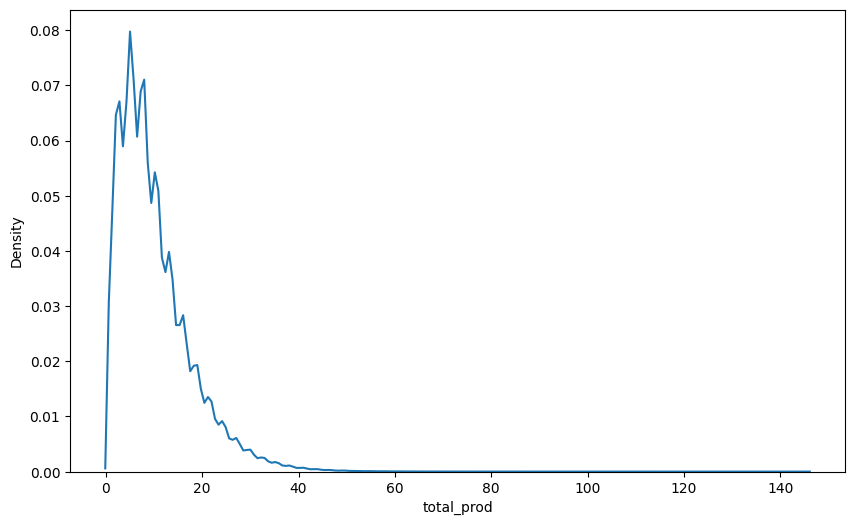

In [134]:
plt.figure(figsize=(10, 6))

sns.kdeplot(x='total_prod', data=order_view)

##### Orders

In [4]:
raw_orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3346078,2266710,206209,prior,10,5,18,29.0
3346079,1854736,206209,prior,11,4,10,30.0
3346080,626363,206209,prior,12,1,12,18.0
3346081,2977660,206209,prior,13,1,12,7.0


In [10]:
raw_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3346083 entries, 0 to 3346082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 178.7+ MB


In [11]:
raw_orders.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [12]:
pd.set_option('display.float_format', '{:.2f}'.format)
raw_orders.describe(exclude= 'object')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3346083.00,3346083.00,3346083.00,3346083.00,3346083.00,3139874.00
mean,1710561.19,102977.79,17.17,2.78,13.45,10.97
std,987575.77,59535.34,17.76,2.04,4.23,9.12
min,1.00,1.00,1.00,0.00,0.00,0.00
25%,855259.50,51391.00,5.00,1.00,10.00,4.00
50%,1710552.00,102675.00,11.00,3.00,13.00,7.00
75%,2565877.00,154387.00,23.00,5.00,16.00,15.00
max,3421083.00,206209.00,100.00,6.00,23.00,30.00


<Axes: xlabel='days_since_prior_order', ylabel='Density'>

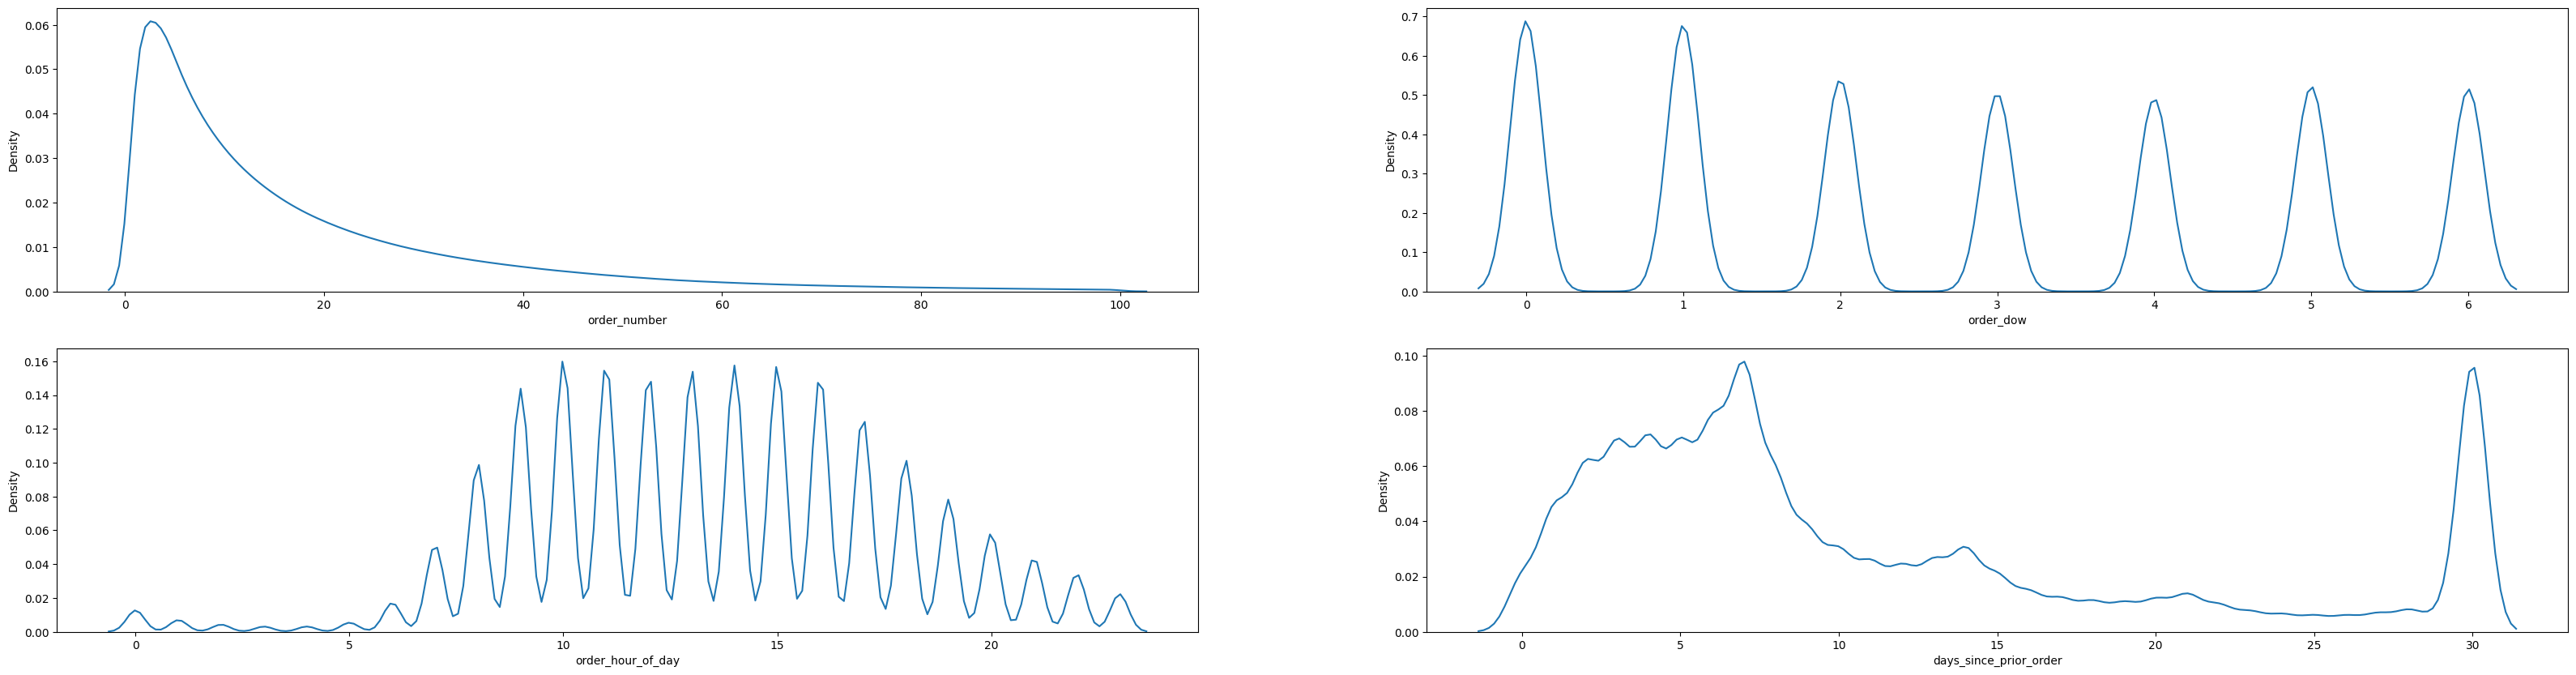

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(40,10))

sns.kdeplot(ax=axes[0,0], x='order_number',  data=raw_orders)
sns.kdeplot(ax=axes[0,1], x='order_dow',  data=raw_orders)
sns.kdeplot(ax=axes[1,0], x='order_hour_of_day',  data=raw_orders)
sns.kdeplot(ax=axes[1,1], x='days_since_prior_order', data=raw_orders)


### Feature Engineering

In [5]:
orders_mod = raw_orders
orders_mod['b_a_12'] = orders_mod['order_hour_of_day'].apply(lambda x: 1 if 13 <= x < 24 else 0)
orders_mod['e_l_week'] = orders_mod['order_dow'].apply(lambda x: 1 if 3 <= x < 7 else 0)

In [6]:
orders_mod = pd.merge(orders_mod, order_view, on='order_id', how ='left')

In [7]:
orders_mod

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,b_a_12,e_l_week,total_prod
0,2539329,1,prior,1,2,8,NaN,0,0,5
1,2398795,1,prior,2,3,7,15.0,0,1,6
2,473747,1,prior,3,3,12,21.0,0,1,5
3,2254736,1,prior,4,4,7,29.0,0,1,5
4,431534,1,prior,5,4,15,28.0,1,1,8
...,...,...,...,...,...,...,...,...,...,...
3346078,2266710,206209,prior,10,5,18,29.0,1,1,9
3346079,1854736,206209,prior,11,4,10,30.0,0,1,8
3346080,626363,206209,prior,12,1,12,18.0,0,0,20
3346081,2977660,206209,prior,13,1,12,7.0,0,0,9


### Client View Transformation

In [26]:
client_view = orders_mod.groupby('user_id').agg(
    frequency=('order_id', 'count'),
    recency=('days_since_prior_order', 'last'),
    mean_products=('total_prod', 'mean'),
    mean_interval=('days_since_prior_order', 'mean'),
    b_a_12 = ('b_a_12', 'mean'),
    e_l_week = ('e_l_week', 'mean')
).reset_index()

In [27]:
client_view

,user_id,frequency,recency,mean_products,mean_interval,b_a_12,e_l_week
0,1,11,14.0,6.363636,19.000000,0.272727,0.545455
1,2,15,30.0,15.066667,16.285714,0.066667,0.266667
2,3,12,15.0,7.333333,12.090909,1.000000,0.250000
3,4,5,0.0,3.600000,13.750000,0.600000,1.000000
4,5,5,6.0,9.200000,11.500000,0.600000,0.400000
...,...,...,...,...,...,...,...
206204,206205,4,10.0,12.750000,16.666667,0.750000,0.500000
206205,206206,67,11.0,4.253731,3.772727,0.925373,0.507463
206206,206207,16,18.0,13.937500,14.333333,0.375000,0.437500
206207,206208,49,7.0,13.816327,7.437500,0.714286,0.448980


<Axes: xlabel='e_l_week', ylabel='Density'>

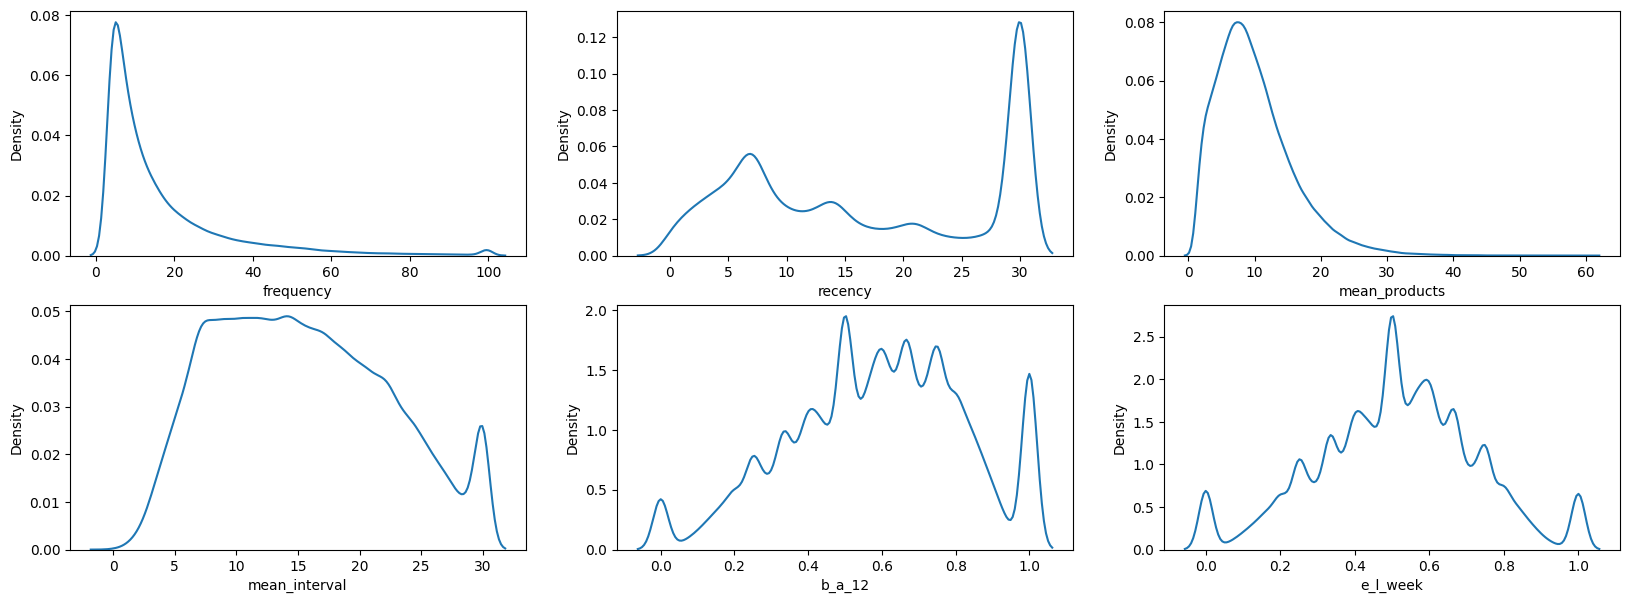

In [16]:
fig, axes = plt.subplots(2,3, figsize=(20,7))

sns.kdeplot(ax=axes[0,0], x='frequency',  data=client_view)
sns.kdeplot(ax=axes[0,1], x='recency',  data=client_view)
sns.kdeplot(ax=axes[0,2], x='mean_products',  data=client_view)
sns.kdeplot(ax=axes[1,0], x='mean_interval',  data=client_view)
sns.kdeplot(ax=axes[1,1], x='b_a_12', data=client_view)
sns.kdeplot(ax=axes[1,2], x='e_l_week',  data=client_view)



#### Log Transformation

In [28]:
client_view2 = client_view.copy()
client_view2['frequency'] = np.log(client_view['frequency']+1)  
client_view2['mean_products'] = np.log(client_view['mean_products']+1)  

<Axes: xlabel='e_l_week', ylabel='Density'>

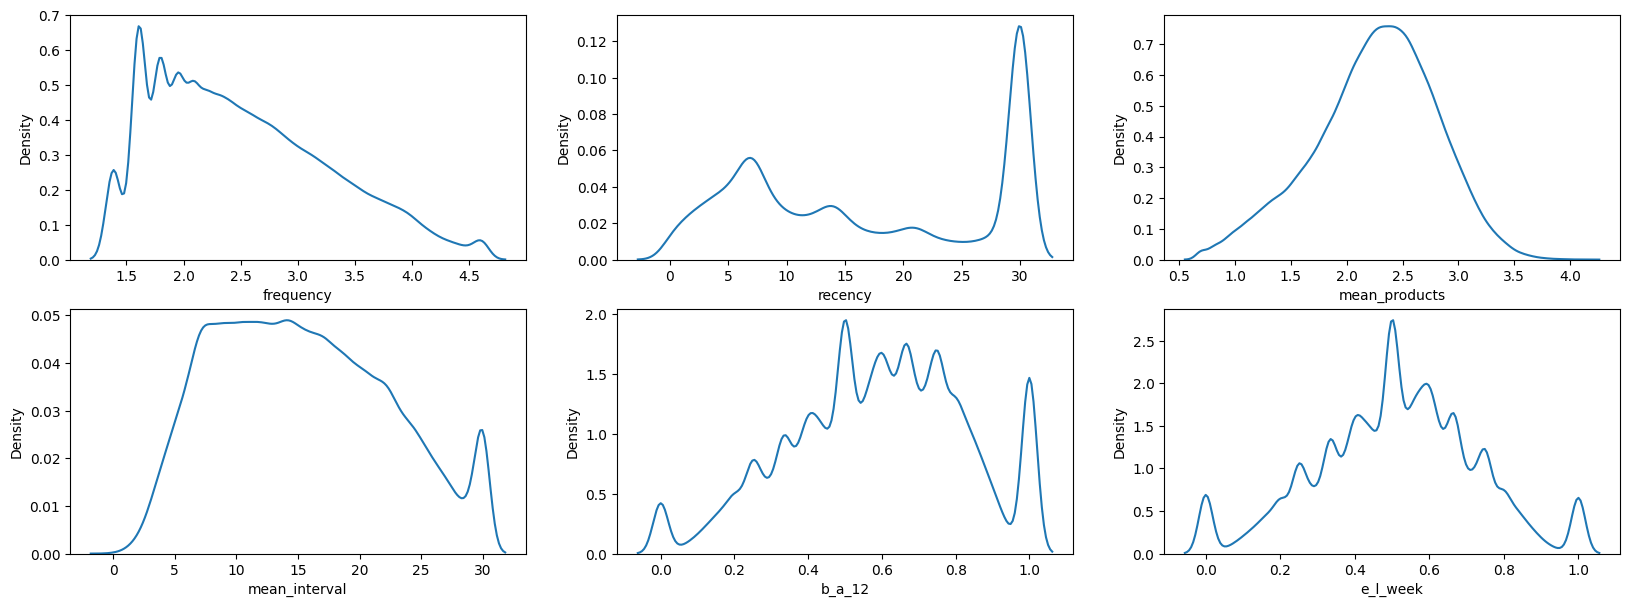

In [18]:
fig, axes = plt.subplots(2,3, figsize=(20,7))

sns.kdeplot(ax=axes[0,0], x='frequency',  data=client_view2)
sns.kdeplot(ax=axes[0,1], x='recency',  data=client_view2)
sns.kdeplot(ax=axes[0,2], x='mean_products',  data=client_view2)
sns.kdeplot(ax=axes[1,0], x='mean_interval',  data=client_view2)
sns.kdeplot(ax=axes[1,1], x='b_a_12', data=client_view2)
sns.kdeplot(ax=axes[1,2], x='e_l_week',  data=client_view2)

### K-means Clustering

In [19]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(client_view2[['frequency','recency','mean_products','mean_interval','b_a_12','e_l_week']])

2
3
4
5
6
7
8
9
10
11


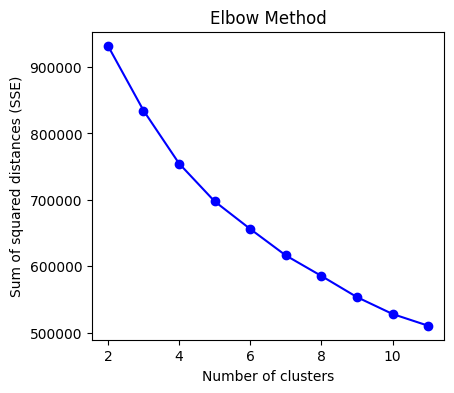

In [20]:
sse = []
K = range(2, 12)

for k in K:
    print(k)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(K, sse, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances (SSE)')

plt.show()

### 4 Clusters

In [41]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=4, random_state=42)

##### PCA

In [ ]:
pca = PCA(n_components=3)
pca_components = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_

pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2', 'PC3'])

pca_df['Cluster'] = kmeans.labels_

fig = px.scatter_3d(
    pca_df, 
    x='PC1', y='PC2', z='PC3', 
    color='Cluster',
    title=f'3D PCA Plot ({explained_variance[0]:.2%} variance in PC1, {explained_variance[1]:.2%} in PC2, {explained_variance[2]:.2%} in PC3)',
    labels={
        'PC1': f'PC1 ({explained_variance[0]:.2%} variance)',
        'PC2': f'PC2 ({explained_variance[1]:.2%} variance)',
        'PC3': f'PC3 ({explained_variance[2]:.2%} variance)',
        'Cluster': 'Cluster'
    },
    width=1000,  
    height=800,  
    size_max= 2,
    opacity=0.5
)
fig.update_traces(marker=dict(size=2))

fig.show()

The result of the PCA was removed due to the size of the 3D visualization.

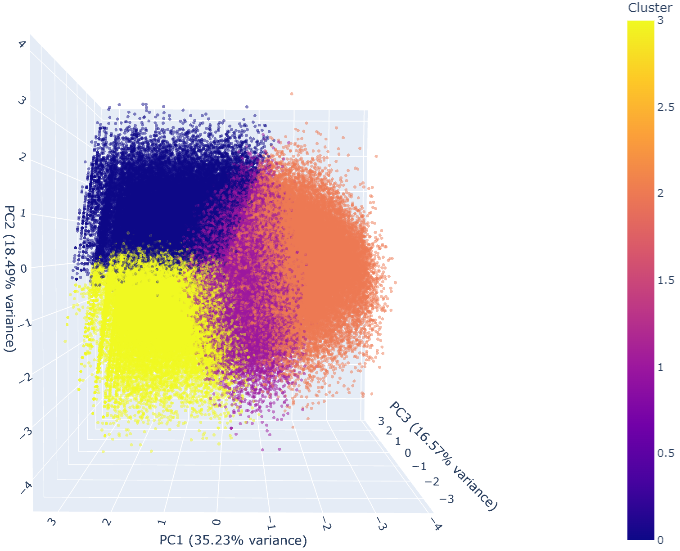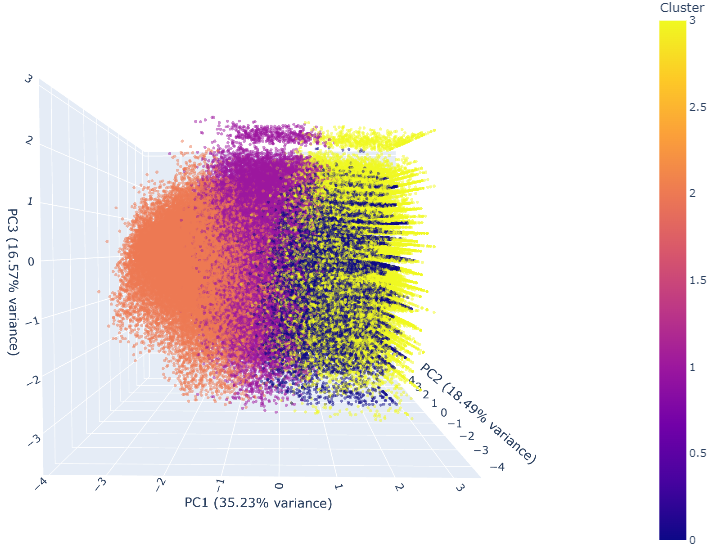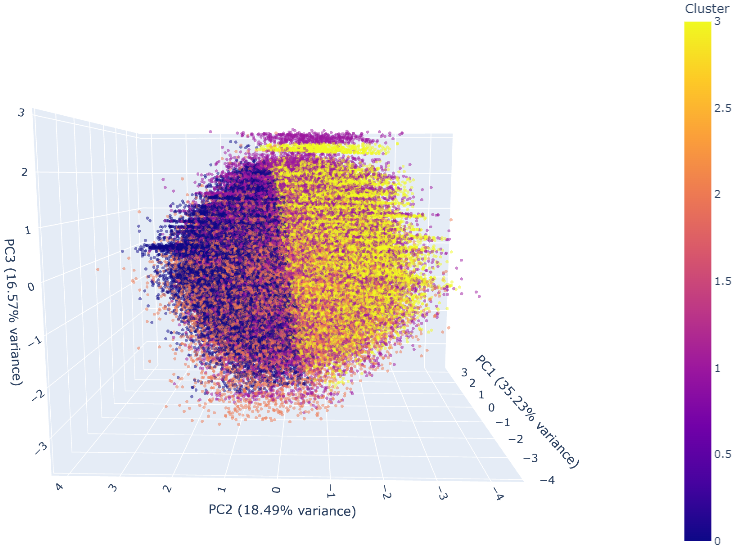

##### Clusters Summary

In [43]:
cluster_summary = client_view[['frequency','recency','mean_products','mean_interval','b_a_12','e_l_week']].copy()
cluster_summary['Cluster'] = kmeans.labels_

summary_stats = cluster_summary.groupby('Cluster').agg(['mean'])

In [44]:
summary_stats

,frequency,recency,mean_products,mean_interval,b_a_12,e_l_week
,mean,mean,mean,mean,mean,mean
Cluster,,,,,,
0,8.814892,24.919091,13.039099,20.011542,0.674790,0.331801
1,9.169484,8.300187,9.482005,12.711247,0.600920,0.555304
2,37.698511,9.085984,10.598874,8.639310,0.545639,0.510408
3,8.078081,26.907937,6.630170,21.346966,0.525669,0.642766


##### Snake Plot

In [45]:
scaled_df = pd.DataFrame(scaled_data,
                        index=client_view[['frequency','recency','mean_products','mean_interval','b_a_12','e_l_week']].index,
                        columns=client_view[['frequency','recency','mean_products','mean_interval','b_a_12','e_l_week']].columns)
scaled_df['Cluster'] = cluster_summary['Cluster']
scaled_df['user_id'] = client_view['user_id'] 

In [46]:
scaled_melt = pd.melt(scaled_df.reset_index(),
                      id_vars = ['user_id', 'Cluster'],
                      value_vars = ['frequency','recency','mean_products','mean_interval','b_a_12','e_l_week'],
                      var_name= 'Attribute',
                      value_name= 'Value')

<Axes: title={'center': 'Snake plot of scaled variables'}, xlabel='Attribute', ylabel='Value'>

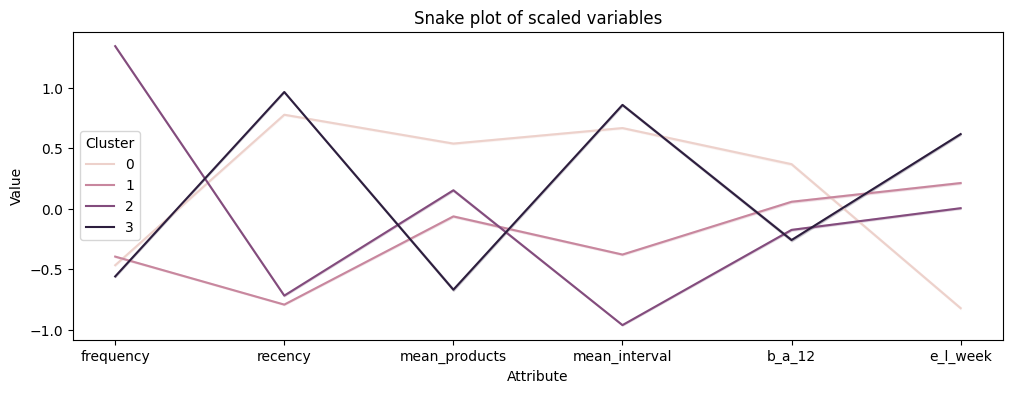

In [47]:
plt.figure(figsize=(12, 4))
plt.title('Snake plot of scaled variables')
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=scaled_melt)

### 5 Clusters

In [21]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=5, random_state=42)

##### PCA

In [ ]:
pca = PCA(n_components=3)
pca_components = pca.fit_transform(scaled_data)

# Explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2', 'PC3'])

# Optional: Add your cluster labels or other groupings
# For this example, we'll create random cluster labels
pca_df['Cluster'] = kmeans.labels_

# Plotting the 3D PCA using plotly.express
fig = px.scatter_3d(
    pca_df, 
    x='PC1', y='PC2', z='PC3', 
    color='Cluster',
    title=f'3D PCA Plot ({explained_variance[0]:.2%} variance in PC1, {explained_variance[1]:.2%} in PC2, {explained_variance[2]:.2%} in PC3)',
    labels={
        'PC1': f'PC1 ({explained_variance[0]:.2%} variance)',
        'PC2': f'PC2 ({explained_variance[1]:.2%} variance)',
        'PC3': f'PC3 ({explained_variance[2]:.2%} variance)',
        'Cluster': 'Cluster'
    },
    width=1000,  # Width of the figure
    height=800,   # Height of the figure
    size_max= 2,
    opacity=0.5
)
fig.update_traces(marker=dict(size=2))
fig.show()

The result of the PCA was removed due to the size of the 3D visualization.

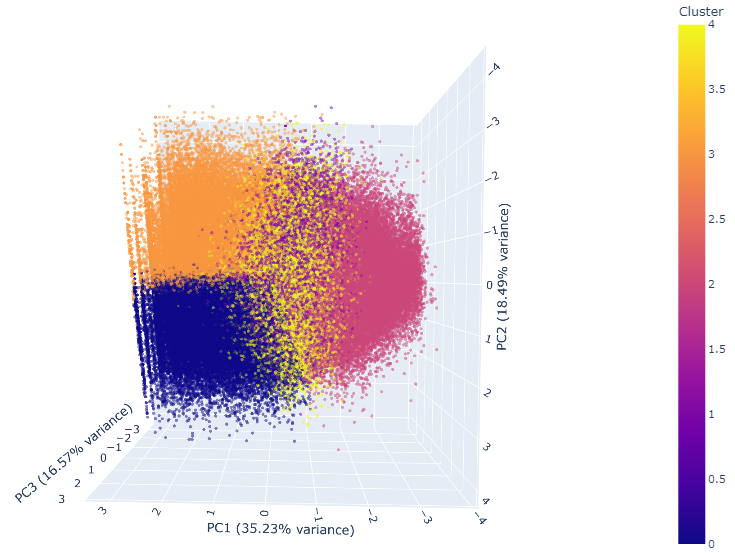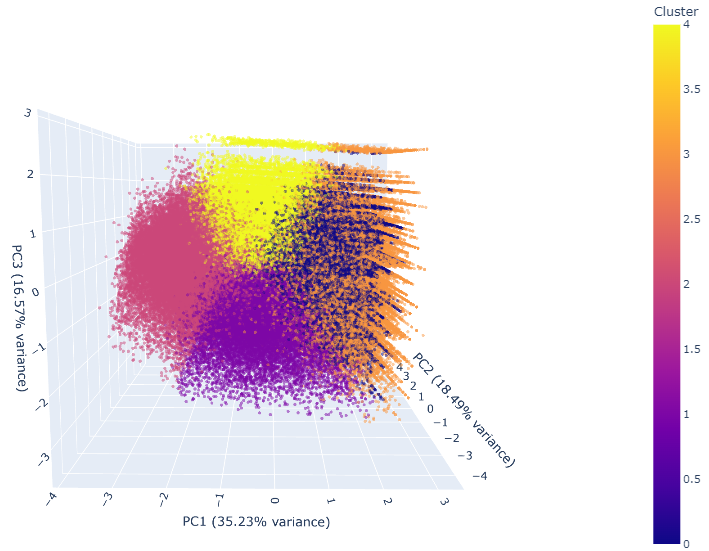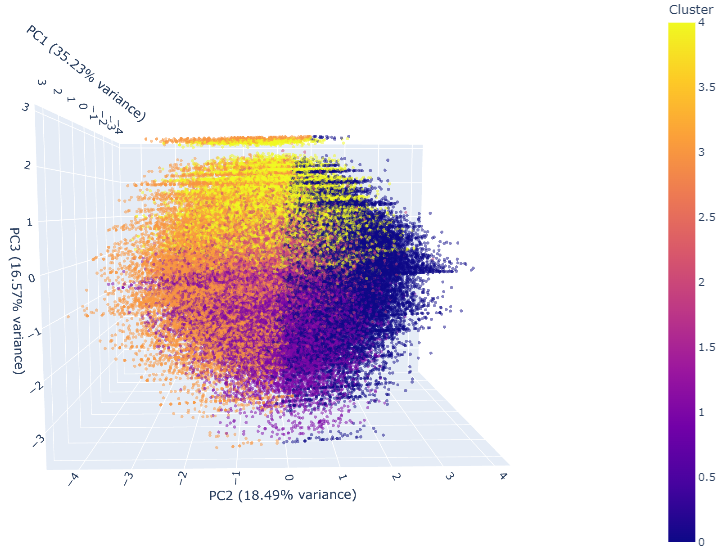

##### Clusters Summary

In [29]:
cluster_summary = client_view[['frequency','recency','mean_products','mean_interval','b_a_12','e_l_week']].copy()
cluster_summary['Cluster'] = kmeans.labels_

summary_stats = cluster_summary.groupby('Cluster').agg(['mean'])

In [31]:
summary_stats

,frequency,recency,mean_products,mean_interval,b_a_12,e_l_week
,mean,mean,mean,mean,mean,mean
Cluster,,,,,,
0,8.625166,26.373799,12.780572,20.657561,0.711381,0.350095
1,10.788967,11.688660,10.450271,13.508223,0.318221,0.420117
2,39.988131,8.620333,10.425966,8.235352,0.563674,0.525883
3,7.887779,27.198380,6.307578,21.725595,0.521916,0.652424
4,10.043838,9.293097,9.692133,13.032926,0.757120,0.593814


##### Snake Plot

In [32]:
scaled_df = pd.DataFrame(scaled_data,
                        index=client_view[['frequency','recency','mean_products','mean_interval','b_a_12','e_l_week']].index,
                        columns=client_view[['frequency','recency','mean_products','mean_interval','b_a_12','e_l_week']].columns)
scaled_df['Cluster'] = cluster_summary['Cluster']
scaled_df['user_id'] = client_view['user_id'] 

In [33]:
scaled_melt = pd.melt(scaled_df.reset_index(),
                      id_vars = ['user_id', 'Cluster'],
                      value_vars = ['frequency','recency','mean_products','mean_interval','b_a_12','e_l_week'],
                      var_name= 'Attribute',
                      value_name= 'Value')

<Axes: title={'center': 'Snake plot of scaled variables'}, xlabel='Attribute', ylabel='Value'>

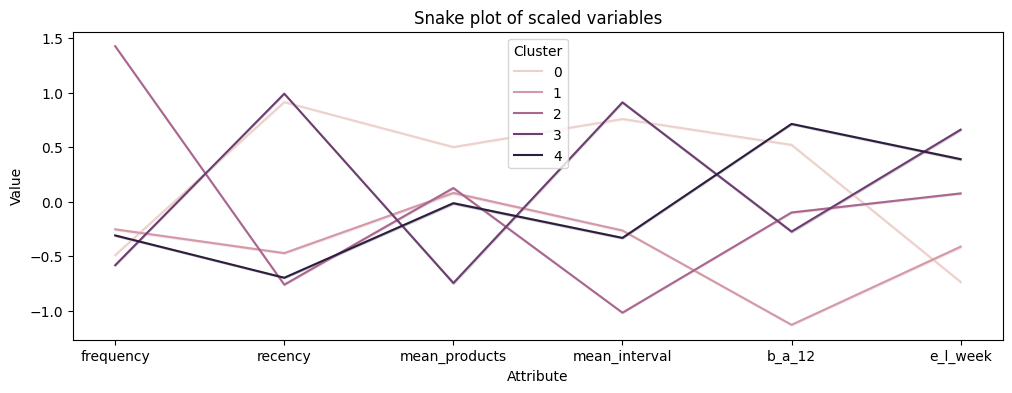

In [40]:
plt.figure(figsize=(12, 4))
plt.title('Snake plot of scaled variables')
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=scaled_melt)
